# Neural Network for Digits

## Summary
* Neural network to recognise handwritten digits from the MNIST dataset.
* Best layout so far: convolution 9 filters 9x9, Hyberbolic tangent (static), fully connected (9x20x20) -> (10x1x1) achieved 97% classification into [0,1,2,3,4,5,6,7,8,9].

## Preliminaries

In [11]:
import sys
sys.path.append('C:/Users/sophi/Desktop/academia_ai-master')
import academia_ai


SyntaxError: invalid syntax (hyperbolic_tangent.py, line 45)

In [1]:
# Import packages
import sys
# If academia_ai is not installed, include its path here
if '../../' not in sys.path:
    sys.path.append('../../')
import numpy as np
from timeit import default_timer as timer
%matplotlib notebook 
import matplotlib.pyplot as plt
import academia_ai as ai

SyntaxError: invalid syntax (hyperbolic_tangent.py, line 45)

In [16]:
# Load digits from disk into collection D (optional filepath to archive "MNIST_academia.npz")
D = ai.digits.DigitCollection()
# Can access training images and solutions as "D.training_images" and  "D.training_solutions"
# and test images and solutions for validation as "D.test_images", "D.test_solutions"

<IPython.core.display.Javascript object>


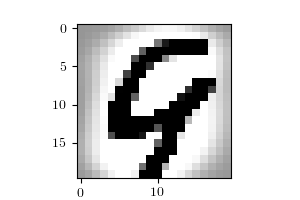

In [17]:
# Plot of an example image
plt.figure(figsize=(3,2))
plt.imshow(D.test_images[0], cmap='Greys', vmin=-1, vmax=1, interpolation='none')

## Create layers and build neural network

In [18]:
'''
It takes dimension (1, 20, 20) as each digit is represented by
one (greyscale) image of dimension 20x20 pixels. It returns
dimension (10, 1, 1) corresponding to the 10 possible outcomes
[0,1,2,3,4,5,6,7,8,9]. The arrays are always kept three-dimensional
for consistency and are stacked along the first axis (depth).
'''

## 1. Create the layers that will constitute our neural network.
# convolutional layer
cl1 = ai.ConvolutionLayer(nr_filters=9, filter_shape=(9,9), stride=1)
# nonlinear element (activation function)
th1 = ai.HyperbolicTangentLayer()
# classification layer mapping to the output categories
full = ai.FullyConnectedLayer(input_shape=(9,20,20), output_shape=(10,1,1))

## 2. Now build a convolutional neural network from the created layers
net = ai.ConvolutionalNeuralNet() # first create a new empty net
net.add_layer(cl1)  # convolution 1; add convolutional layer cl1 to the net # (9,20,20)
net.add_layer(th1)  # tangent hyperbolicus 1
net.add_layer(full) # Classification layer

net.pprint()

Convolutional Neural Network containing the following 3 layers:
Convolutional layer with 9 filters of shape (9, 9)
tangent hyperbolicus layer with m= 0.6666666666666666 and alpha= 1.7159 and beta= 0
FullyConnectedLayer with input_shape (9, 20, 20) and output_shape (10, 1, 1)
Properites of weights: MIN= -0.06 MAX= 0.07 MEAN= 0.0 VAR= 0.0


## Check out forward propagation
Should yield a result, verifying that we got the dimensions of the layers right. The weights are initialized randomly, the net should average 10% classification success.

<IPython.core.display.Javascript object>


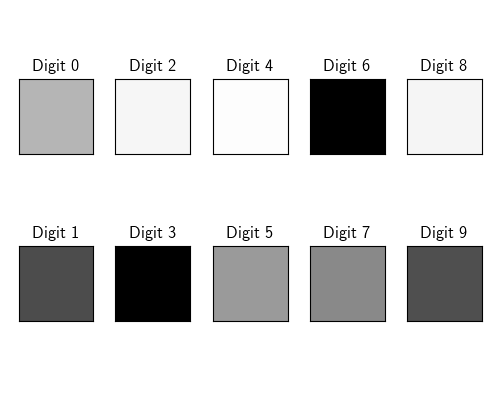

Classified label: 6
Correct label: 8


In [8]:
digit_index = 0
dig = D.training_images[digit_index]
sol = D.training_solutions[digit_index]
result = net.forward_prop(dig)
# Plot the result after propagating through the net
fig, axarr = plt.subplots(2, 5, figsize=(5,4))
for x in range(2):
    for y in range(5):
        axarr[x, y].imshow(result[x+2*y], cmap='Greys', vmin=-1, vmax=1)
        axarr[x, y].set_title('Digit '+str(x+2*y))
        axarr[x, y].get_xaxis().set_visible(False)
        axarr[x, y].get_yaxis().set_visible(False)
plt.tight_layout()
print('Classified label:', np.argmax(result))
print('Correct label:', np.argmax(sol))

## Do some training and save the net

In [9]:
learning_rate = 1e-5
start = timer()
net.train(D.training_images, D.training_solutions, learning_rate, iterations=1)
end = timer()
print('Training took', end-start, 'seconds.') # (usually around 140 seconds for one iteration)

Training took 131.9384433689993 seconds.


In [10]:
# Save the network after training. 
# If you have a network you are happy with, always take checkpoints between
# calls to train(). If the net starts diverging during training the network is usually lost.
net.save('data/digit_dummy.pkl')

Saved net in file: data/digit_dummy.pkl


## Examine results of training

In [11]:
# Check probability of successful identification using the test set
success = net.test_net(D.test_images, D.test_solutions)
print('Success Rate:', success)

Success Rate: 0.8554


## Check working, pretrained network

In [12]:
net_trained = ai.ConvolutionalNeuralNet.load('data/digit_network_trained.pkl')

In [13]:
# Check probability for successful identification
net_trained.test_net(D.test_images, D.test_solutions)

0.9743

<IPython.core.display.Javascript object>


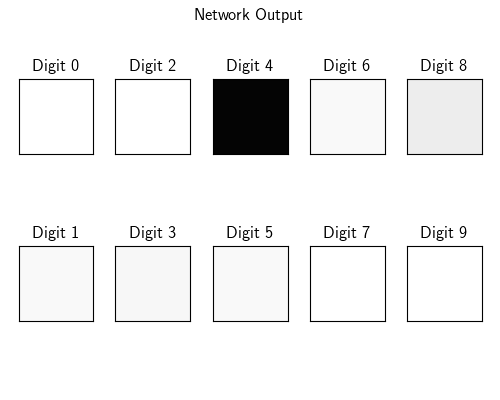

Classified label: 4
Correct label: 4


<IPython.core.display.Javascript object>


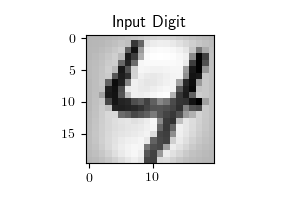

In [14]:
# Inspect some forward propagations
digit_index = 33 # Change index here to plot another one 

dig = D.training_images[digit_index]
sol = D.training_solutions[digit_index]
result = net_trained.forward_prop(dig)
fig, axarr = plt.subplots(2, 5, figsize=(5,4))
plt.suptitle('Network Output')
for x in range(2):
    for y in range(5):
        axarr[x, y].imshow(result[x+2*y], cmap='Greys', vmin=-1, vmax=1)
        axarr[x, y].set_title('Digit '+str(x+2*y))
        axarr[x, y].get_xaxis().set_visible(False)
        axarr[x, y].get_yaxis().set_visible(False)
plt.tight_layout()
print('Classified label:', np.argmax(result))
print('Correct label:', np.argmax(sol))
plt.figure(figsize=(3,2))
plt.imshow(dig, cmap='Greys')
plt.title('Input Digit')
plt.tight_layout()